<a href="https://colab.research.google.com/github/GulayKaplan/Int_ML_Bootcamp2022/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MEDICAL COST ANALYSIS**

**Importing Libraries**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

**EXPLORATORY DATA ANALYSIS** 

In [4]:
dataOrg = pd.read_csv('insurance.csv')
df = dataOrg.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Check  missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# statistical summary of the numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**DATA VISUALISATION**

*Examine the distribution of Bmi (Body Mass Index)*

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


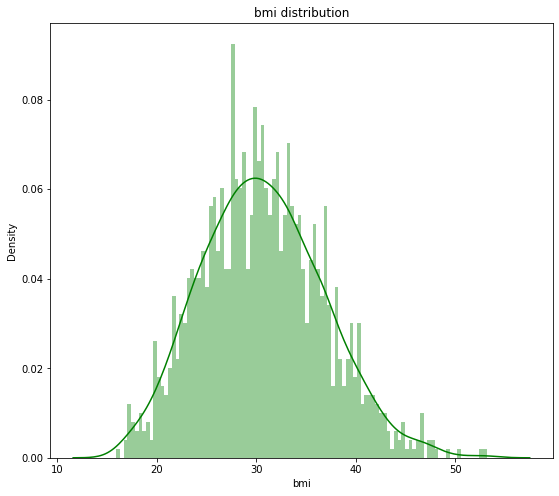

In [8]:
print(df['bmi'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['bmi'], color='g', bins=100).set(title='bmi distribution');

*Examine the relationship between “smoker” and “charges”*

In [9]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [10]:
label_encoding('smoker')
label_encoding('sex')

In [11]:
one_hot = pd.get_dummies(df['region'])

In [12]:
df = pd.concat([df, one_hot],axis = 1)
df.drop('region',axis = 1, inplace = True)
df.head() 

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [14]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


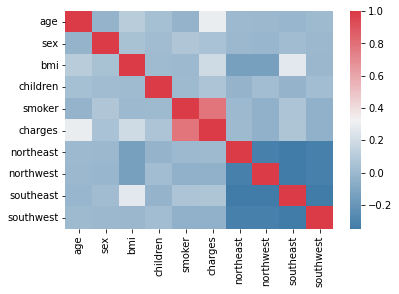

In [15]:
sns.heatmap(df.corr(),cmap=sns.diverging_palette(240,10,as_cmap=True));

In [16]:
df.corr()['charges'].sort_values(ascending=False)

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
sex          0.057292
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
Name: charges, dtype: float64

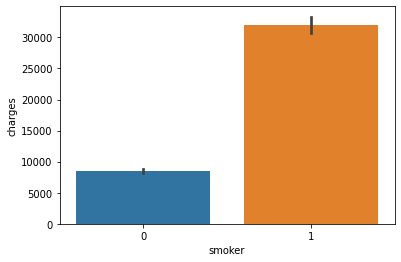

In [17]:
sns.barplot(x="smoker",y="charges",data=df);


**Conclusion : There is high correlation between charges and smoking**


*Examine the relationship between “smoker” and “region”*

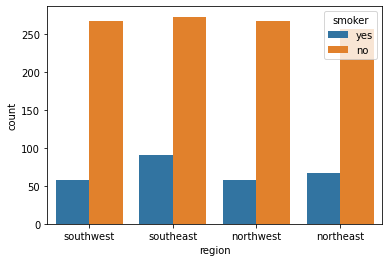

In [18]:
sns.countplot(x="region", hue="smoker", data=dataOrg);

*Examine the relationship between “bmi” and “sex”*

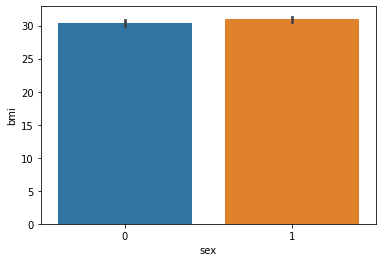

In [19]:
sns.barplot( x="sex", y="bmi",data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


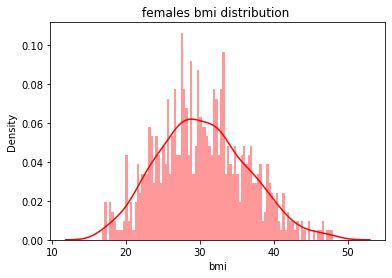

In [20]:
sns.distplot(dataOrg[(dataOrg["sex"] == "female")]["bmi"],color='r', bins=100).set(title='females bmi distribution ');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


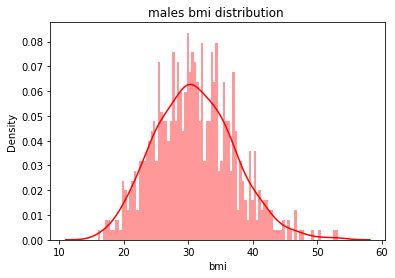

In [21]:
sns.distplot(dataOrg[(dataOrg["sex"] == "male")]["bmi"],color='r', bins=100).set(title='males bmi distribution ');

*Find the "region" with the most "children"*

In [22]:
dataOrg.groupby('region')['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

**Conclusion : The Southwest is the region has the most children**

*Examine the relationship between “age” and “bmi”*

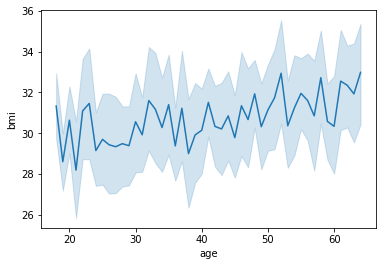

In [23]:
sns.lineplot(x="age", y="bmi", data=df);

*Examine the relationship between “bmi” and “children”*

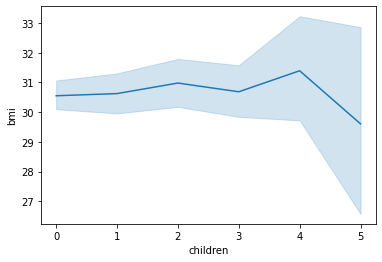

In [24]:
sns.lineplot(x="children", y="bmi", data=df);

*Is there an outlier in the "bmi" variable? Please review.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


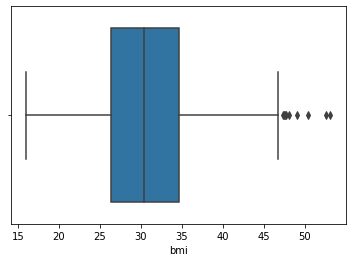

In [25]:
sns.boxplot(df['bmi']);

**Conclusion : The bmi values greater than 46 are olutliers** 

*Examine the relationship between “bmi” and “charges”*

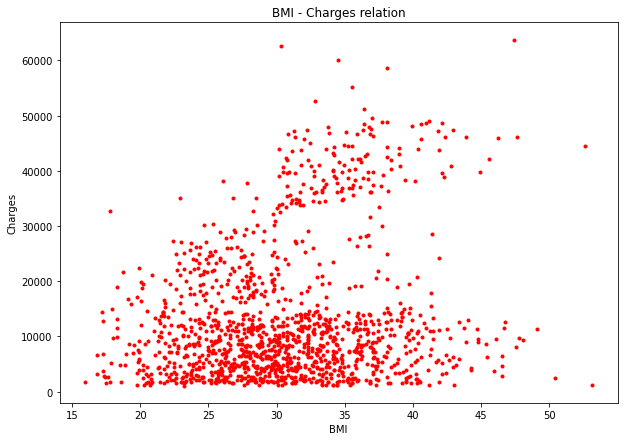

In [26]:
plt.figure(figsize=(10, 7))
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title("BMI - Charges relation")
plt.scatter(df['bmi'],df['charges'], marker=".", color='red')
plt.show()


*Examine the relationship between “region”, “smoker” and “bmi” using bar plot*

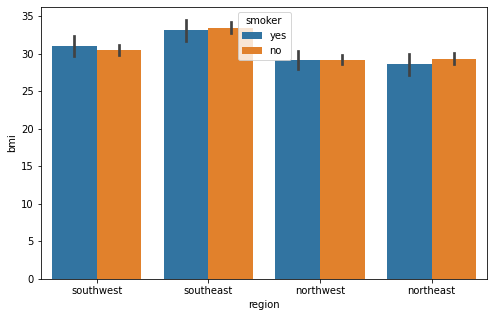

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='region',y='bmi',hue='smoker',data=dataOrg);

**DATA PREPROCESSING**

*Normalisation*

In [28]:
scaler = MinMaxScaler()
normalizedData = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalizedData, columns=df.columns)
print(normalized_df)

           age  sex       bmi  children  smoker   charges  northeast  \
0     0.021739  0.0  0.321227       0.0     1.0  0.251611        0.0   
1     0.000000  1.0  0.479150       0.2     0.0  0.009636        0.0   
2     0.217391  1.0  0.458434       0.6     0.0  0.053115        0.0   
3     0.326087  1.0  0.181464       0.0     0.0  0.333010        0.0   
4     0.304348  1.0  0.347592       0.0     0.0  0.043816        0.0   
...        ...  ...       ...       ...     ...       ...        ...   
1333  0.695652  1.0  0.403820       0.6     0.0  0.151299        0.0   
1334  0.000000  0.0  0.429379       0.0     0.0  0.017305        1.0   
1335  0.000000  0.0  0.562012       0.0     0.0  0.008108        0.0   
1336  0.065217  0.0  0.264730       0.0     0.0  0.014144        0.0   
1337  0.934783  0.0  0.352704       0.0     1.0  0.447249        0.0   

      northwest  southeast  southwest  
0           0.0        0.0        1.0  
1           0.0        1.0        0.0  
2           0.0

*Splitting Dataset*

In [29]:
train, test = train_test_split(normalized_df, test_size=0.2) 

X_train = train.drop("charges",axis=1)
y_train = train.loc[:,"charges"]

X_test = test.drop("charges",axis=1)
y_test = test.loc[:,"charges"]

print(f"""
X Train: {X_train.shape}
Y Train: {y_train.shape}
X Test:  {X_test.shape}
Y Test:  {y_test.shape}
""")


X Train: (1070, 9)
Y Train: (1070,)
X Test:  (268, 9)
Y Test:  (268,)



*Model Selection*

In [30]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()
GBR= GradientBoostingRegressor()

In [31]:
linreg_scores = cross_val_score(linreg,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)
scores = np.sqrt(-linreg_scores)  
print(f"RMSE={scores}")
print(f"Mean={scores.mean()}, Std Dev={scores.std()}")

RMSE=[0.0916362  0.1073508  0.09300283 0.09749434 0.10844278 0.08349737
 0.07706087 0.12055627 0.10281677 0.08900746]
Mean=0.09708657146484445, Std Dev=0.01231055055767332


In [32]:
DecTree_scores = cross_val_score(DecTree,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)
scores = np.sqrt(-DecTree_scores)  
print(f"RMSE={scores}")
print(f"Mean={scores.mean()}, Std Dev={scores.std()}")

RMSE=[0.09428616 0.11285209 0.08344128 0.11624067 0.10106779 0.09386516
 0.10385563 0.11716798 0.1008123  0.12162876]
Mean=0.1045217825664867, Std Dev=0.01161100688646955


In [33]:
RandForest_scores = cross_val_score(RandForest,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)
scores = np.sqrt(-RandForest_scores)  
print(f"RMSE={scores}")
print(f"Mean={scores.mean()}, Std Dev={scores.std()}")

RMSE=[0.06771814 0.08992041 0.06066878 0.07795894 0.07863372 0.05797219
 0.07056348 0.10288212 0.07348341 0.07658739]
Mean=0.07563885901350598, Std Dev=0.012612560491986025


In [34]:
SVM_scores = cross_val_score(SVM,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)
scores = np.sqrt(-SVM_scores)  
print(f"RMSE={scores}")
print(f"Mean={scores.mean()}, Std Dev={scores.std()}")

RMSE=[0.10321454 0.10963303 0.09618833 0.10271686 0.11381234 0.09850287
 0.10106403 0.11691384 0.10885375 0.10127694]
Mean=0.10521765185659024, Std Dev=0.006426907998593748


In [35]:
GBR_scores = cross_val_score(GBR,
                              X_train,y_train,
                              scoring = 'neg_mean_squared_error',
                              cv=10)
scores = np.sqrt(-GBR_scores)  
print(f"RMSE={scores}")
print(f"Mean={scores.mean()}, Std Dev={scores.std()}")



RMSE=[0.06051763 0.08748225 0.06183462 0.07089667 0.07446208 0.05761127
 0.0664452  0.09852171 0.07091541 0.06568836]
Mean=0.07143751961553399, Std Dev=0.012088426988962134


**Conclusion: GradientBoostingRegressor has the lowest RMSE (Root Mean Squared Error).**

**PARAMETER TUNING**

In [36]:
params = {'n_estimators': [50,100,150], 
          'learning_rate':[.001,0.01,.1],
          'max_depth':[2,4,6],
          'subsample':[.5,.75,1],} 

In [37]:
grid_s = GridSearchCV(GBR, params, 
                     cv=5,
                     scoring='neg_mean_squared_error')

In [38]:
grid_s.fit(X_train,y_train);
grid_s.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1}

**The best parameter values**:learning_rate': 0.1, 'max_depth': 2, 
'n_estimators': 100, 'subsample': 0.75 

**PREDICTING**

In [39]:
predictions = grid_s.best_estimator_.predict(X_test)

In [40]:
comparison = pd.DataFrame({'Y Test': y_test[0:10].values,
                          'Predictions' : predictions[0:10]})
comparison

,Y Test,Predictions
0,0.169453,0.087333
1,0.084476,0.099811
2,0.009404,0.029197
3,0.175706,0.206414
4,0.443765,0.209023
5,0.196467,0.217434
6,0.259222,0.297519
7,0.113629,0.132408
8,0.009734,0.007483
9,0.010175,0.032981


**EVALUATION**

In [42]:
mse = mean_squared_error(y_test,predictions)
print(f"Mean Squared Error={mse}")
rmse = np.sqrt(mse)
print(f"nRoot Mean Squared Error={rmse}")
r_squared = r2_score(y_test,predictions)
print(f"R Squared Value={r_squared}")
mae = mean_absolute_error(y_test,predictions)
print(f"Mean Absolute Error= {mae}")

Mean Squared Error=0.005806436768929403
nRoot Mean Squared Error=0.07619997879874642
R Squared Value=0.856352166648275
Mean Absolute Error= 0.0436298726256538
